In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [182]:
df= pd.read_csv('IceCreamData.csv')
df

,Temperature,Revenue,Unnamed: 2
0,24.566884,534.799028,NaN
1,26.005191,625.190122,NaN
2,27.790554,660.632289,NaN
3,20.595335,487.706960,NaN
4,11.503498,316.240194,NaN
...,...,...,...
495,22.274899,524.746364,NaN
496,32.893092,755.818399,NaN
497,12.588157,306.090719,NaN
498,22.362402,566.217304,NaN


In [183]:
df.isnull().sum()

Temperature      1
Revenue          1
Unnamed: 2     500
dtype: int64

In [184]:
df= df.drop('Unnamed: 2', axis=1)
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [185]:
df.isnull().sum()

Temperature    1
Revenue        1
dtype: int64

In [186]:
df = df.dropna()

In [187]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [188]:
df.describe()

,Temperature,Revenue
count,499.000000,499.000000
mean,22.186598,520.612001
std,8.039908,174.264336
min,0.000000,10.000000
25%,17.111720,405.455916
50%,22.387604,528.380417
75%,27.724420,641.626340
max,42.515280,969.291630


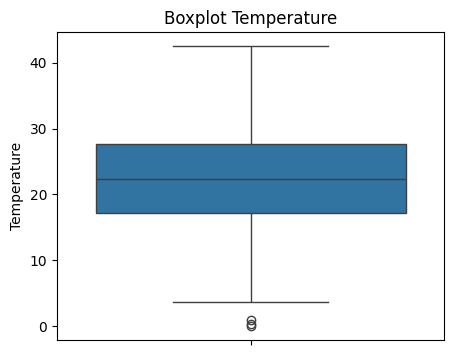

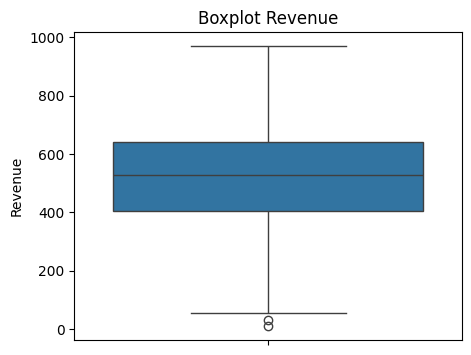

In [189]:
for col in df:
    plt.figure(figsize=(5,4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot {col}")
    plt.ylabel(col)
    plt.show()

In [190]:
cols = ['Temperature', 'Revenue']

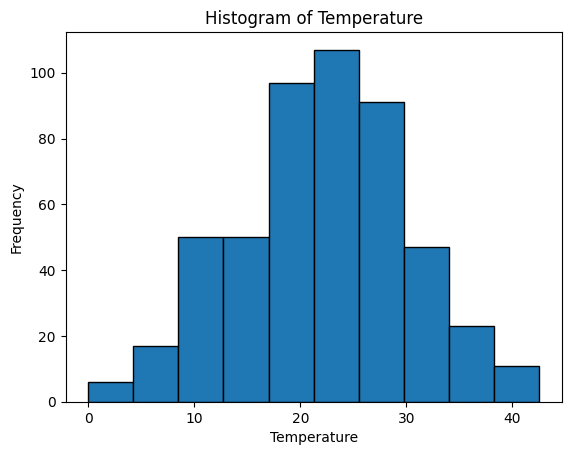

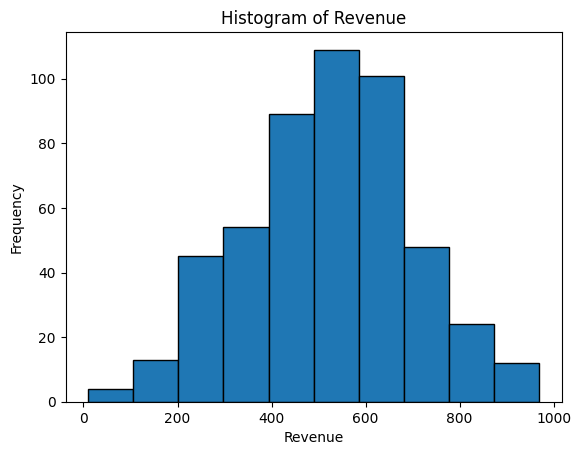

In [191]:
for col in cols:
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [192]:
df.describe()

,Temperature,Revenue
count,499.000000,499.000000
mean,22.186598,520.612001
std,8.039908,174.264336
min,0.000000,10.000000
25%,17.111720,405.455916
50%,22.387604,528.380417
75%,27.724420,641.626340
max,42.515280,969.291630


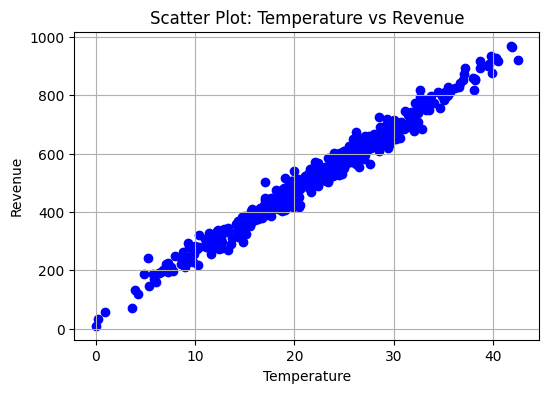

In [193]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Temperature'], df['Revenue'], color='blue')
plt.title('Scatter Plot: Temperature vs Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

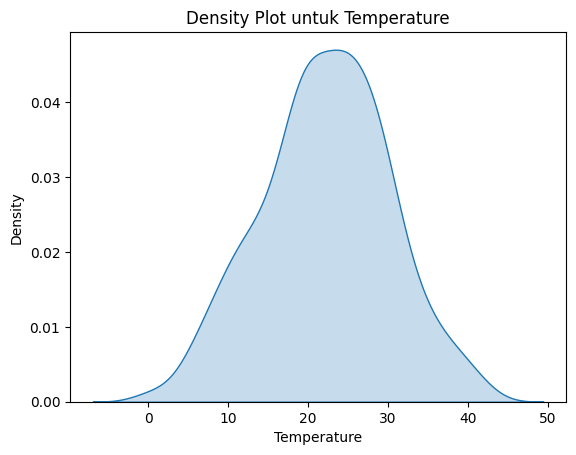

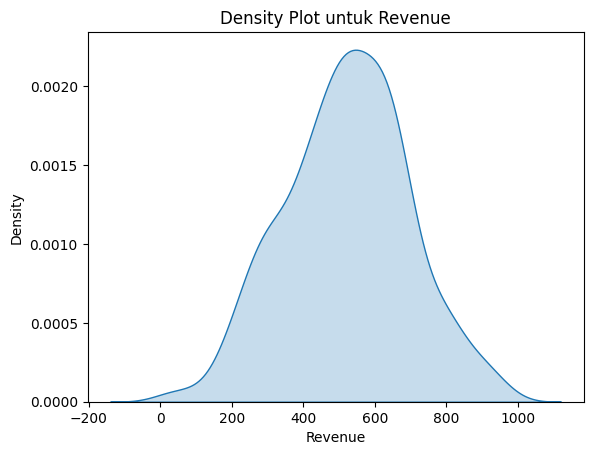

In [194]:
for col in cols:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot untuk {col}')
    plt.show()

In [195]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

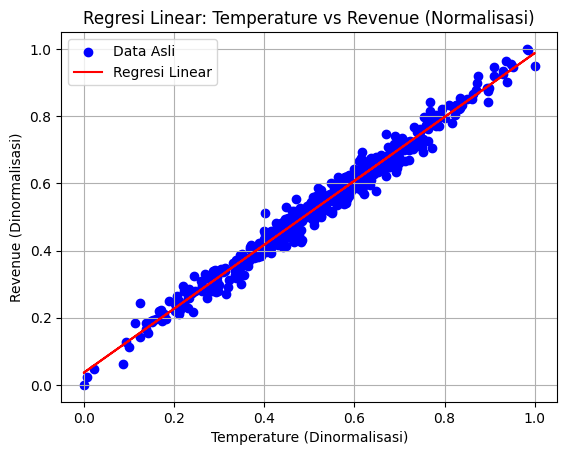

Mean Squared Error (MSE) pada data uji: 0.0006128093234056637
Root Mean Squared Error (RMSE) pada data uji: 0.024754985829235767
Mean Absolute Error (MAE) pada data uji: 0.018542376965198844
R-squared (R2) pada data uji: 0.9783581642446455
Koefisien (slope): 0.9512061604901917
Intercept: 0.03648519846114562


In [196]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi menggunakan Min-Max Scaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['Temperature', 'Revenue']] = scaler.fit_transform(df[['Temperature', 'Revenue']])

# Memisahkan fitur dan target
X = df_normalized[['Temperature']].values  # Fitur
y = df_normalized['Revenue'].values  # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_linear.predict(X), color='red', label='Regresi Linear')
plt.title('Regresi Linear: Temperature vs Revenue (Normalisasi)')
plt.xlabel('Temperature (Dinormalisasi)')
plt.ylabel('Revenue (Dinormalisasi)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)   # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)   # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)

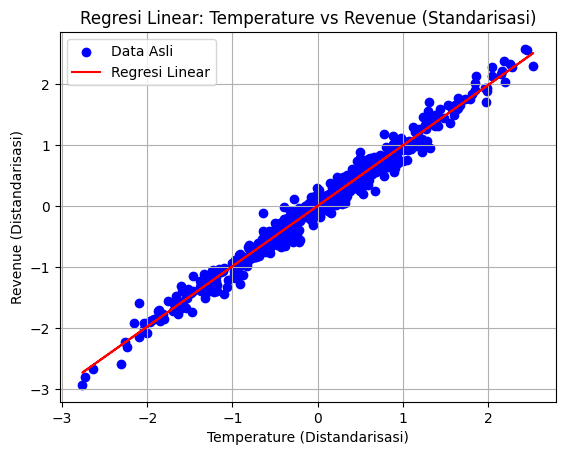

Mean Squared Error (MSE) pada data uji: 0.018607192313110487
Root Mean Squared Error (RMSE) pada data uji: 0.13640818272050428
Mean Absolute Error (MAE) pada data uji: 0.10217464726455872
R-squared (R2) pada data uji: 0.9783581642446455
Koefisien (slope): 0.9901998352811744
Intercept: 0.003261307743533358


In [197]:
from sklearn.preprocessing import StandardScaler

# Standarisasi menggunakan StandardScaler
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[['Temperature', 'Revenue']] = scaler.fit_transform(df[['Temperature', 'Revenue']])

# Memisahkan fitur dan target
X = df_standardized[['Temperature']].values  # Fitur
y = df_standardized['Revenue'].values  # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_linear.predict(X), color='red', label='Regresi Linear')
plt.title('Regresi Linear: Temperature vs Revenue (Standarisasi)')
plt.xlabel('Temperature (Distandarisasi)')
plt.ylabel('Revenue (Distandarisasi)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)   # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)   # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)

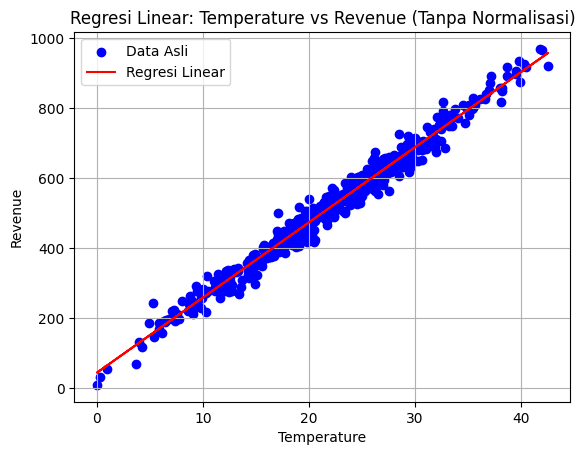

Mean Squared Error (MSE) pada data uji: 563.9319156591603
Root Mean Squared Error (RMSE) pada data uji: 23.747250696852472
Mean Absolute Error (MAE) pada data uji: 17.787547015603092
R-squared (R2) pada data uji: 0.9783581642446455
Koefisien (slope): 21.46249769453642
Intercept: 44.999945488072115


In [198]:
# Memisahkan fitur dan target (tanpa normalisasi)
X = df[['Temperature']].values  # Fitur
y = df['Revenue'].values             # Target

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model_linear.predict(X), color='red', label='Regresi Linear')
plt.title('Regresi Linear: Temperature vs Revenue (Tanpa Normalisasi)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)   # Mean Squared Error
rmse = np.sqrt(mse)                              # Root Mean Squared Error
mae  = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2   = r2_score(y_test, y_pred_test)             # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)

1. Apa arti nilai intercept (b₀) dari model regresi linear yang kamu dapatkan?

Intercept (b₀) menunjukkan prediksi pendapatan Revenue jika suhu Temperature = 0°C. Secara praktis, ini adalah baseline revenue saat suhu sangat rendah.

2. Apa arti nilai koefisien/slope (b₁) pada model regresi?

3. Apakah hubungan antara Temperature dan Revenue bersifat positif atau negatif?

4. Berapa nilai 
R
2
 yang kamu peroleh, dan apa artinya?

5. Apa makna dari nilai MSE dan RMSE?